In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

In [7]:
class Star():
	'''
	inputs
	------

	'''
	def __init__(self, Mass,weight): # initaionliing the class with mass
		self.mass=Mass #giving star class atribute mass
		self.StartMass=Mass
		self.calc_rest() # profoming calc_rest fucntion definded below
		self.TLife=1.1*self.TMS
		self.Dead=False # Giving star atribute dead and initalizing it to false i.e. star is alive
		self.Blown=False
		self.Weight=weight
		self.SNIa=False
	
	def calc_rest(self): #defining calc_rest 
		self.TMS=10**10 *(self.mass)**(-3.5) # calculating the time on the main sequnce 
	
	def Wind(self): # setting up wind procedure for stars past MS
		if self.Blown==True: #checking for wind 
			print("Star's wind already accounted for") # rpinting error message
			return 0,0,0,0,0,0 # retunring 0 mass to ism
		else:
			if self.mass>=3: # for stars greater than or equal to 3 solar masses
				self.Blown==True
				winda=0.015*self.mass
				windb=0.01*self.mass
				self.mass=self.mass-sum([0,0,winda,winda,windb,0.00])
				return 0,0,winda*self.Weight,winda*self.Weight,windb*self.Weight,0.00
			else:
				self.Blown==True
				return 0,0,0,0,0,0

	def Kill(self): # setting up Kill funciton
		iMass=copy.deepcopy(self.mass)
		rem=0
		H=0
		He=0
		He2=0
		if self.Dead==True: # checking if star has not already been killed
			print("Star already Dead ", self.mass) # Printing warning
			return 0,0,0,0,0,0 # retuening 0 mass to ism
		else:
			if self.StartMass>=8: # for massive stars
				self.Dead=True #setting the dead atribute to true
				if self.StartMass<50: # for less massive set mass for neutron star as reminent
					self.mass=1.4 # setting mass for reminent
				else:
					self.mass=3.0 # setting mass of remeninat for very massive stars.
				rem=iMass-(0.1+0.1+0.1+0.03)-self.mass
				return 0.76*rem*self.Weight,0.24*rem*self.Weight,0.1*self.Weight,0.1*self.Weight,0.1*self.Weight,0.03*self.Weight # returning masses of elemens given to ISM  [H, He, C,N,O,Fe]
			elif self.StartMass<=3:
				self.Dead=True# setting dead to True
				self.mass=0.6
				H=(self.StartMass-self.mass) *0.76
				He=(self.StartMass-self.mass) *0.24
				excess=0.000
				excess=(H+He+self.mass-self.StartMass)
				return H*self.Weight,He*self.Weight+excess*self.Weight,0,0,0,0
			elif self.StartMass<=8: # for non massive stars
				self.Dead=True# setting dead to True
				self.mass=0.6
				H=(s.StartMass-self.mass) *0.76
				He=(s.StartMass-self.mass) -H
				if (H+He+self.mass)-self.StartMass !=0:
					dale=0
					#print('\nMed')
					#print(self.StartMass)
					#print((H+He)-self.StartMass)
					#sys.exit()
				return H*self.Weight,He*self.Weight,0,0,0,0# returning masses of elemens given to ISM  [H,He, C,N,O,Fe]


In [3]:
def IMF():
	Masses=[]
	Weights=[]
	Mran=np.linspace(0.1,100,10000)
	#Const=36354.560545987355
	C= lambda Min, Max,total: total/(-0.35)*(Max**(-(0.35))-Min**(-(0.35)))
	N= lambda M1, M2: C(0.1,100,10**12)/(-1.35) *(M2**(-(1.35))-M1**(-(1.35)))
	for i in range(1,len(Mran)):
	    Masses.append((Mran[i-1]+Mran[i])/2)
	    Weights.append(N(Mran[i-1],Mran[i]))
	        
	return Masses,Weights # returning IMF mass array
MassArray,WeightArray=IMF() #Getting mass array from above function 
Galaxy=[] #creating an empty galaxy
for i in range(len(MassArray)): #populating galazy with stars from IMF
	Galaxy.append(Star(MassArray[i],WeightArray[i])) #appending Galaxyarray with star objects

In [20]:
def IMF(Mass):
	Masses=[]
	Weights=[]
	Mran=np.linspace(0.1,100,10000)
	#Const=36354.560545987355
	C= 3.35*Mass/(100**1.35)/20
	N= lambda M1: C*M1**(-(1.35))
	for i in range(1,len(Mran)):
	    #Masses.append((Mran[i-1]+Mran[i])/2)
	    Masses.append(Mran[i])
	    Weights.append(N(Mran[i]))
	        
	return Masses,Weights # returning IMF mass array
iMStar=10**12
MassArray,WeightArray=IMF(iMStar)

In [21]:
totalmass=sum([a*b for a,b in zip(MassArray,WeightArray)])
print('%.2E'%totalmass)

1.01E+12


In [5]:
LookBack= lambda z: (2/(3*H0))*(1-(1/(1+z)**(3/2)))
H0= 1/13.8e9

In [30]:
Z=np.linspace(0,12,1000) #creating array of reshifts staring at z=12 and going to 0 with 100000 elements
Time1=LookBack(Z)
Time=np.abs(Time1-max(Time1))[::-1]
t=Time[767]

In [33]:
Z[Time==t][0]

9.213213213213214

In [2]:
DATA=ascii.read('OutputBig.csv')
DATA.show_in_notebook()

idx,z,Time,ISM,Stars,H,He,C,N,O,Fe
0,0.0,0.0,1000000000000.0,2029912283701.7332,760000000000.0,240000000000.0,0.0,0.0,0.0,0.0
1,0.012012012012012012,163311205.6303573,2717416320031.781,312337303549.8362,1290690916421.0955,407586605185.6064,5890076612.294557,5890076612.294557,5732995351.507368,1625649848.9798906
2,0.024024024024024024,321847326.4863908,2738860877161.6543,273351383576.75992,1306988645318.276,412733256416.29456,5890106112.627834,5890106112.627834,5733024851.840646,1625738349.9797177
3,0.036036036036036036,475801569.1486285,2749531828155.0312,257720699060.19464,1315098530378.8904,415294272751.2256,5890114378.933036,5890114378.933036,5733033118.145847,1625763148.8953233
4,0.04804804804804805,625357204.1644762,2756174563345.5503,251077963869.67584,1320147009123.685,416888529196.9502,5890114378.933036,5890114378.933036,5733033118.145847,1625763148.8953233
5,0.06006006006006006,770688183.519772,2761338705717.5215,245913821497.70465,1324071757326.3833,418127923366.2233,5890114378.933036,5890114378.933036,5733033118.145847,1625763148.8953233
6,0.07207207207207207,911959713.2678356,2765019421788.366,242233105426.86038,1326869101540.2249,419011295223.22595,5890114378.933036,5890114378.933036,5733033118.145847,1625763148.8953233
7,0.08408408408408408,1049328785.0320913,2767955289309.5254,239297237905.70166,1329100360856.3057,419715903428.30396,5890114378.933036,5890114378.933036,5733033118.145847,1625763148.8953233
8,0.0960960960960961,1182944669.753151,2770150010551.1514,237102516664.07565,1330768348999.9414,420242636526.2941,5890114378.933036,5890114378.933036,5733033118.145847,1625763148.8953233
9,0.10810810810810811,1312949376.7414486,2772336811683.537,234915715531.68988,1332430317860.5544,420767468798.0667,5890114378.933036,5890114378.933036,5733033118.145847,1625763148.8953233


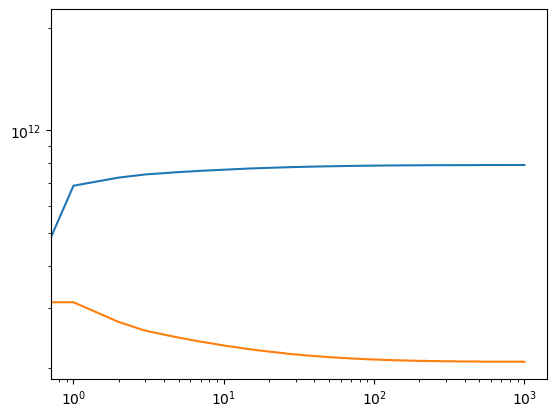

In [48]:
x=np.ones(DATA['ISM'].shape)*DATA['ISM'][0]
plt.loglog(x-DATA['Stars'])
plt.loglog(DATA['Stars'])

In [10]:
DATA=ascii.read('OutputBigSB.csv')
DATA.show_in_notebook()

idx,z,Time,ISM,Stars,H,He,C,N,O,Fe
0,0.0,0.0,1000000000000.0,1014956141850.8666,760000000000.0,240000000000.0,0.0,0.0,0.0,0.0
1,0.012012012012012012,163311205.6303573,1868640549273.733,146236262517.08566,643058475729.9756,203071097598.93823,7258897216.903943,7258897216.903943,7180356586.5102825,812824924.4899453
2,0.024024024024024024,321847326.4863908,1881936917549.1802,132939894241.63805,652332742245.2097,205999813340.59116,7623359223.090485,7623359223.090485,7544818592.696824,812824924.4899453
3,0.036036036036036036,475801569.1486285,1888877726701.294,125999085089.52327,657607757200.8169,207665607537.0987,7623359223.090485,7623359223.090485,7544818592.696824,812824924.4899453
4,0.04804804804804805,625357204.1644762,1893330462230.3154,121546349560.50203,660991836202.8733,208734264064.0638,7623359223.090485,7623359223.090485,7544818592.696824,812824924.4899453
5,0.06006006006006006,770688183.519772,1896879534216.155,117997277574.6632,663689130912.1108,209586041340.6652,7623359223.090485,7623359223.090485,7544818592.696824,812824924.4899453
6,0.07207207207207207,911959713.2678356,1899464634971.6047,115412176819.21335,665653807486.2527,210206465521.97318,7623359223.090485,7623359223.090485,7544818592.696824,812824924.4899453
7,0.08408408408408408,1049328785.0320913,1901564872101.9622,113311939688.85556,667249987705.3246,210710522433.25906,7623359223.090485,7623359223.090485,7544818592.696824,812824924.4899453
8,0.0960960960960961,1182944669.753151,1903159844401.8179,111716967389.0,668462166653.2148,211093315785.22437,7623359223.090485,7623359223.090485,7544818592.696824,812824924.4899453
9,0.10810810810810811,1312949376.7414486,1904772592759.5735,110104219031.24469,669687855405.109,211480375391.08563,7623359223.090485,7623359223.090485,7544818592.696824,812824924.4899453


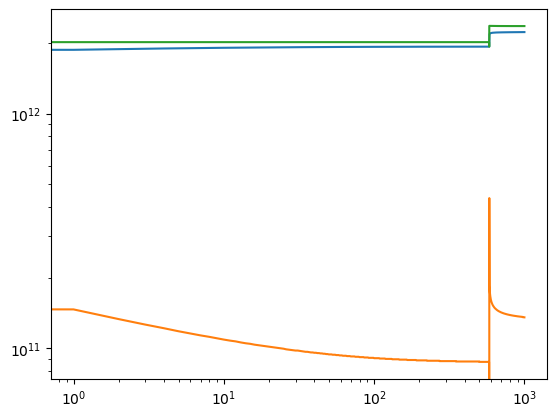

In [5]:
plt.loglog(DATA['ISM'])
plt.loglog(DATA['Stars'])
plt.loglog(DATA['ISM']+DATA['Stars'])

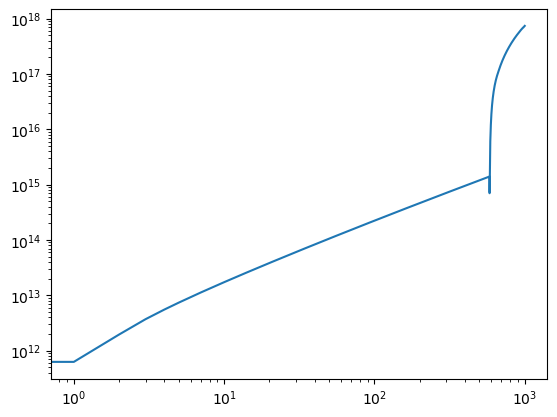

In [44]:
plt.loglog(DATA['H'])

In [29]:
mass=1.9683168316831685
TMS=10**10 *(mass)**(-3.5)
TLife=1.1*TMS

In [32]:
'%0.2E'%TLife

'1.03E+09'

In [35]:
H0= 1/13.8e9#Hubble constant needs to be in s^-1
Z=np.linspace(0,12,1000)
LookBack= lambda z: (2/(3*H0))*(1-(1/(1+z)**(3/2)))
Time=LookBack(Z)


In [47]:
DATA['ISM'].shape

(1000,)

In [3]:
loc=np.where(DATA['z']==8.0)

In [5]:
H=DATA['H'][loc]+0.76*DATA['Stars'][loc]
O=DATA['O'][loc]

In [6]:
12+np.log(O/H)

6.425740097124127


In [20]:
S=Star(3.0,1)

In [26]:
loc=np.where(S.TLife+2e8<DATA['Time'])

In [27]:
loc

(array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
         55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
         68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
         81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
         94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
        107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
        120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 178, 179, 180